In [17]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.layers import BatchNormalization

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


Text(0.5, 1.0, 'Classe 5')

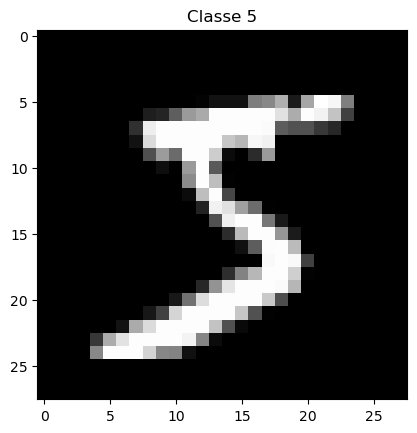

In [6]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Classe ' + str(y_train[0]))

In [7]:
predictors_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

In [8]:
predictors_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [9]:
predictors_train = predictors_train.astype('float32')
predictors_test = predictors_test.astype('float32')

In [10]:
predictors_train /= 255
predictors_test /= 255

In [13]:
class_train = to_categorical(y_train, 10)
class_test = to_categorical(y_test, 10)

In [19]:
classifier = Sequential()
# convolution layer
classifier.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(32, (3,3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
# Dense NN
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=10, activation='softmax'))
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [20]:
classifier.fit(
    predictors_train, class_train, batch_size=128, epochs=5,
    validation_data=(predictors_test, class_test)
)

Epoch 1/5
469/469 [==============================] - 8s 16ms/step - loss: 0.1981 - accuracy: 0.9390 - val_loss: 0.1496 - val_accuracy: 0.9590
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0628 - accuracy: 0.9810 - val_loss: 0.0433 - val_accuracy: 0.9863
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0445 - accuracy: 0.9867 - val_loss: 0.0377 - val_accuracy: 0.9890
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0363 - accuracy: 0.9892 - val_loss: 0.0309 - val_accuracy: 0.9912
Epoch 5/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0303 - accuracy: 0.9909 - val_loss: 0.0368 - val_accuracy: 0.9901


In [21]:
result = classifier.evaluate(predictors_test, class_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0368 - accuracy: 0.9901
